In [1]:
import os 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

PATH = os.path.abspath(os.path.join(os.getcwd(), (os.pardir+'/')*3)) # main path
print(PATH)

e_signals = pd.read_csv(os.path.join(PATH, 'data_preproc/LightSignal_decomp_e.csv'), 
                        sep=';', header=0, index_col=0)

idx = e_signals[e_signals.max(axis=1)>1].index
e_signals = e_signals.loc[idx, :]

mu_signals = pd.read_csv(os.path.join(PATH, 'data_preproc/LightSignal_decomp_mu.csv'),
                         sep=';', header=0, index_col=0)
mu_signals = mu_signals.loc[idx]

idx2 = mu_signals[mu_signals.max(axis=1)>1].index

e_signals = e_signals.loc[idx2, :]
mu_signals = mu_signals.loc[idx2,:]
mu_signals.shape

/Users/javigamero/MyMac/DS_Master/TFM


(11793, 1000)

In [2]:
Arms_e = np.sqrt(e_signals.apply(lambda x: x**2).sum(axis=1)/1000)
Arms_e

0_1       4.133522
0_4       3.353058
0_6       4.916706
0_7       0.515752
0_8       5.543825
            ...   
399_40    0.735527
399_43    3.641703
399_44    0.826438
399_48    0.645755
399_50    4.677286
Length: 11793, dtype: float64

In [3]:
Arms_mu = np.sqrt(mu_signals.apply(lambda x: x**2).sum(axis=1)/1000)

In [4]:
Arms = pd.DataFrame({'e': Arms_e, 
                     'mu': Arms_mu}, 
                     index=mu_signals.index
                    )
# Arms = Arms.fillna(0)
Arms = Arms[Arms['e'] != 0]
# Arms['mu'] = Arms['mu'].apply(lambda x: 0 if x==-np.inf else x)
Arms

,e,mu
0_1,4.133522,90.649584
0_4,3.353058,67.712104
0_6,4.916706,60.945049
0_7,0.515752,101.105272
0_8,5.543825,56.397722
...,...,...
399_40,0.735527,3.174114
399_43,3.641703,44.730057
399_44,0.826438,96.720975
399_48,0.645755,79.150420


In [5]:
SNR = 20*np.log10(Arms['mu']/Arms['e'])
SNR_mean = SNR[SNR!=-np.inf].mean()
print(SNR_mean)
SNR

30.453561816675112


0_1       26.820912
0_4       26.104504
0_6       21.865283
0_7       45.846660
0_8       20.149040
            ...    
399_40    12.700478
399_43    21.785899
399_44    41.366206
399_48    41.767704
399_50    25.853171
Length: 11793, dtype: float64

In [6]:
# index = Arms[Arms['e']>1].index
index = SNR[SNR<SNR_mean].index
len(index)

6973

In [7]:
e = e_signals.loc[index,:]
mu = mu_signals.loc[index,:]

0_1


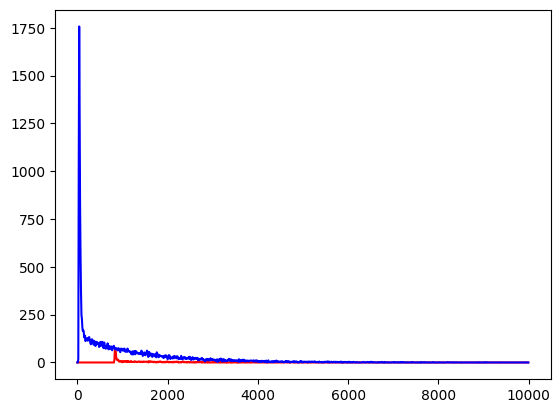

In [8]:
i = 0

print(e.iloc[i,:].name)
plt.figure()
plt.plot(np.arange(1,10000,10), e.iloc[i,:], c='r')
plt.plot(np.arange(1,10000,10), mu.iloc[i,:], c='b')

plt.show()

Text(0, 0.5, 'Count')

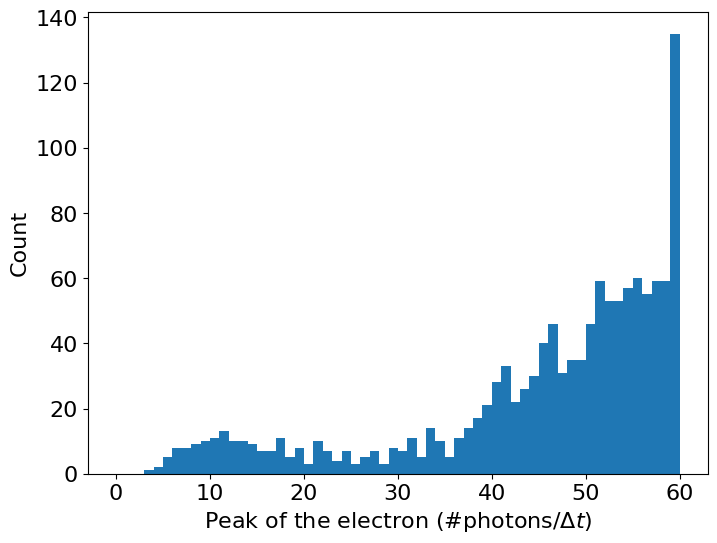

In [17]:
plt.rcParams['font.size'] = str(16) 
plt.figure(figsize=(8,6))
plt.hist(e.max(axis=1), range=(0,60), bins=60)
plt.xlabel(r'Peak of the electron (#photons/$\Delta t$)')
plt.ylabel('Count')

In [10]:
e.max(axis=1)

0_1        74.0
0_4        68.0
0_6        90.0
0_8       115.0
0_9       164.0
          ...  
399_37     68.0
399_38     69.0
399_40     15.0
399_43     80.0
399_50     87.0
Length: 6973, dtype: float64